# Comparing Gaussian to h277 analog migration schemes

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import sys
import os
sys.path.append(os.path.abspath('../src/scripts'))
from utils import multioutput_to_pandas, box_smooth, get_color_list
from _globals import ZONE_WIDTH, END_TIME
import paths
import vice

In [3]:
# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (5, 3),
})

## 1. Radial Migration

In [10]:
diffusion_stars = multioutput_to_pandas('diffusion/insideout/powerlaw_slope11')
gaussian_stars = multioutput_to_pandas('gaussian/insideout/powerlaw_slope11')

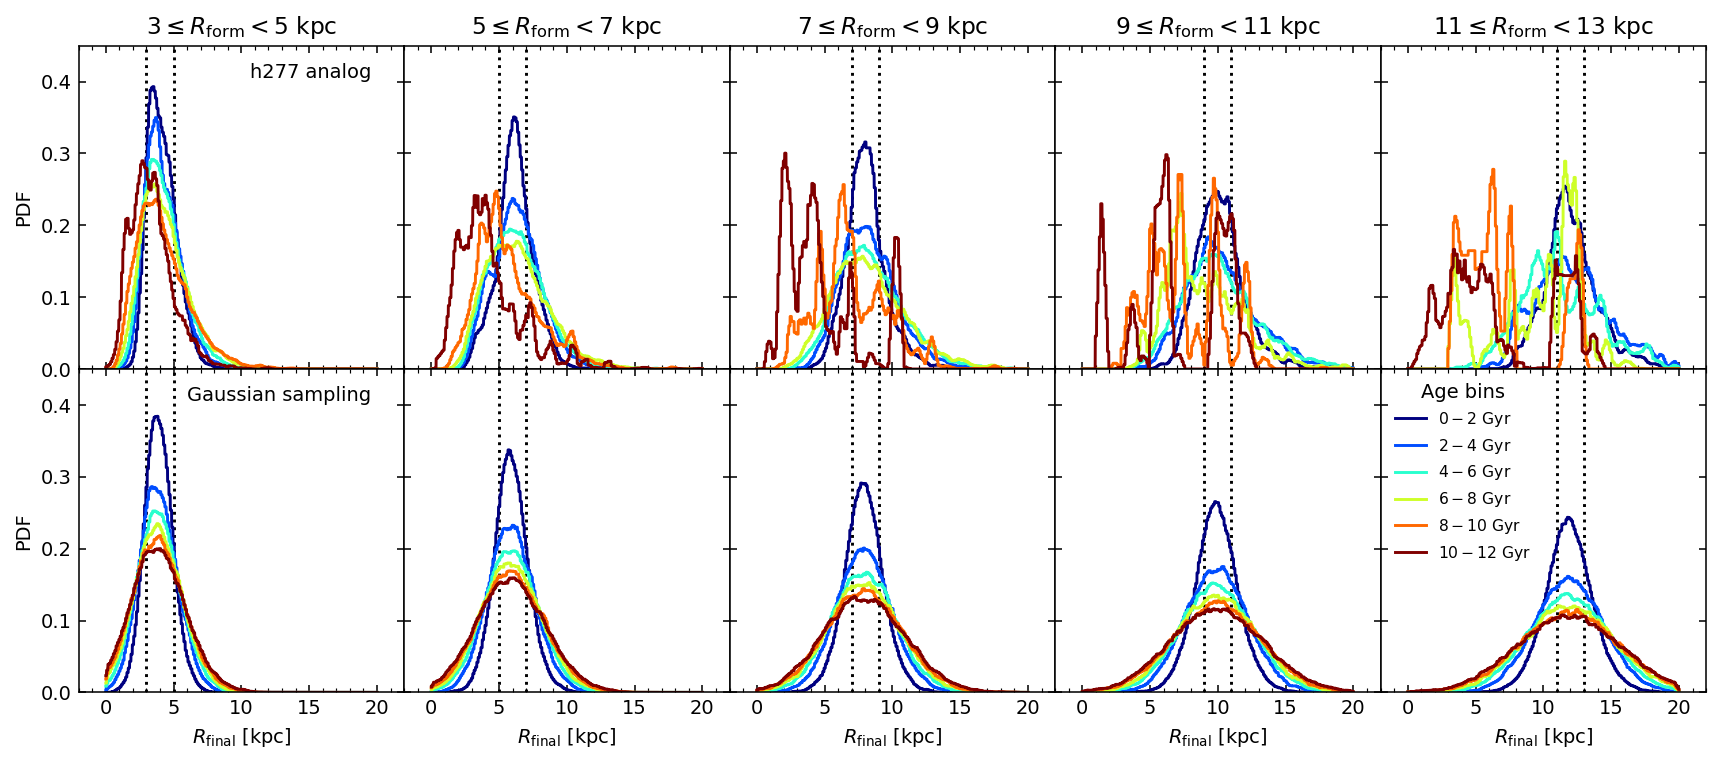

In [11]:
data_list = [diffusion_stars, gaussian_stars]
labels = ['h277 analog', 'Gaussian sampling']

rform_bins = np.arange(3, 15, 2, dtype='float')
age_bins = np.arange(0, 14, 2, dtype='float')
dr_bins = np.arange(-20, 20.1, 0.1)
rfinal_bins = np.arange(0, 20.01, 0.01)

# pick discrete colors
cmap = plt.get_cmap('jet')
colors = get_color_list(cmap, age_bins)

fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.)

for m, row in enumerate(axs):
    stars = data_list[m]
    stars['dr'] = stars['galr_final'] - stars['galr_origin']
    row[0].text(0.9, 0.9, labels[m], ha='right', transform=row[0].transAxes)
    for i, ax in enumerate(row):
        rform_lim = tuple(rform_bins[i:i+2])
        ax.vlines(rform_lim, ymin=0, ymax=0.6, linestyle=':', color='k')
        if m == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        for j, color in enumerate(colors):
            age_lim = tuple(age_bins[j:j+2])
            # bin h277 data by formation radius and age
            subset = stars[(stars['galr_origin'] >= rform_lim[0]) &
                           (stars['galr_origin'] <  rform_lim[1]) &
                           (stars['age']         >= age_lim[0]) &
                           (stars['age']         <  age_lim[1])]
            # limit to bins with a meaningful number of stars
            if subset.shape[0] > 100:
                hist, _ = np.histogram(subset['galr_final'], rfinal_bins, 
                                       density=True)
                # apply boxcar smoothing with a width of 0.5 kpc
                hist_smooth = box_smooth(hist, rfinal_bins, 0.5)
                bin_centers = (rfinal_bins[:-1] + rfinal_bins[1:]) / 2
                ax.plot(bin_centers, hist_smooth, c=color, ls='-', 
                        label=r'$%d - %d$ Gyr' % age_lim)

axs[0,0].xaxis.set_major_locator(MultipleLocator(5))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1))
# axs[0,0].set_xlim((-12, 12))
axs[0,0].set_xlim((-2, 22))
axs[0,0].set_ylim((0, 0.45))
for ax in axs[-1]:
    # ax.set_xlabel(r'$\Delta R_{\rm{gal}}$ [kpc]')
    ax.set_xlabel(r'$R_{\rm{final}}$ [kpc]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[1,-1].legend(title='Age bins', loc='upper left', fontsize=8, frameon=False)
plt.show()

## 2. Vertical Migration

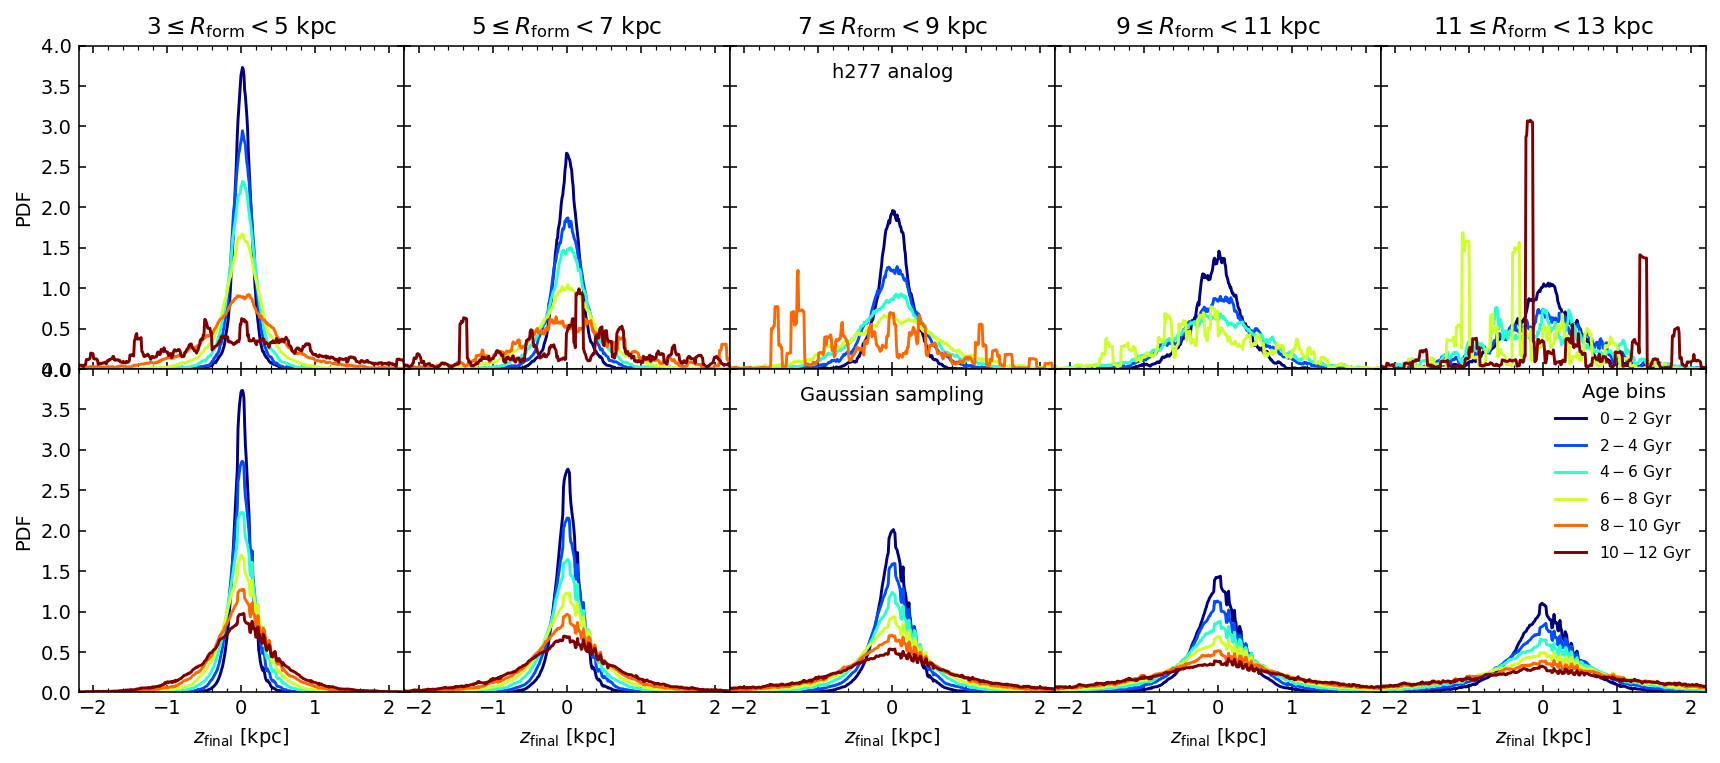

In [18]:
data_list = [diffusion_stars, gaussian_stars]
labels = ['h277 analog', 'Gaussian sampling']

rform_bins = np.arange(3, 15, 2, dtype='float')
age_bins = np.arange(0, 14, 2, dtype='float')
zfinal_bins = np.arange(-5, 5.01, 0.01)

# pick discrete colors
cmap = plt.get_cmap('jet')
colors = get_color_list(cmap, age_bins)

fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.)

for m, row in enumerate(axs):
    stars = data_list[m]
    row[2].text(0.5, 0.9, labels[m], ha='center', transform=row[2].transAxes)
    for i, ax in enumerate(row):
        rform_lim = tuple(rform_bins[i:i+2])
        ax.vlines(rform_lim, ymin=0, ymax=0.6, linestyle=':', color='k')
        if m == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        for j, color in enumerate(colors):
            age_lim = tuple(age_bins[j:j+2])
            # bin h277 data by formation radius and age
            subset = stars[(stars['galr_origin'] >= rform_lim[0]) &
                           (stars['galr_origin'] <  rform_lim[1]) &
                           (stars['age']         >= age_lim[0]) &
                           (stars['age']         <  age_lim[1])]
            # limit to bins with a meaningful number of stars
            no_dups = subset.drop_duplicates('zfinal')
            if no_dups.shape[0] > 100:
                hist, _ = np.histogram(subset['zfinal'], zfinal_bins, 
                                       density=True)
                # apply boxcar smoothing with a width of 0.1 kpc
                hist_smooth = box_smooth(hist, zfinal_bins, 0.1)
                bin_centers = (zfinal_bins[:-1] + zfinal_bins[1:]) / 2
                ax.plot(bin_centers, hist_smooth, c=color, ls='-', 
                        label=r'$%d - %d$ Gyr' % age_lim)

axs[0,0].xaxis.set_major_locator(MultipleLocator(1.))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.2))
axs[0,0].set_xlim((-2.2, 2.2))
axs[0,0].set_ylim((0, 4.0))
for ax in axs[-1]:
    # ax.set_xlabel(r'$\Delta R_{\rm{gal}}$ [kpc]')
    ax.set_xlabel(r'$z_{\rm{final}}$ [kpc]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[1,-1].legend(title='Age bins', loc='upper right', fontsize=8, frameon=False)
plt.show()

## 3. Stellar Surface Density Gradient

In [20]:
diffusion_output = vice.multioutput(str(paths.data / 'migration/diffusion/insideout/powerlaw_slope11'))
gaussian_output = vice.multioutput(str(paths.data / 'migration/gaussian/insideout/powerlaw_slope11'))

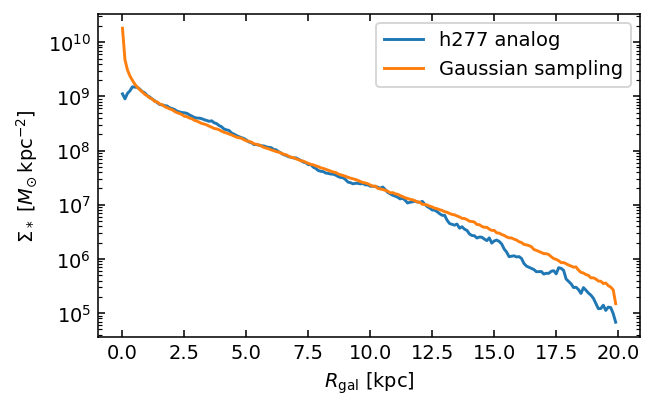

In [24]:
radii = np.arange(0, 20, ZONE_WIDTH)
areas = np.pi * ((radii + ZONE_WIDTH)**2 - radii**2)
labels = ['h277 analog', 'Gaussian sampling']

fig, ax = plt.subplots()
output_list = [diffusion_output, gaussian_output]
for n, output in enumerate(output_list):
    dt = output.zones['zone0'].history['time'][1] - output.zones['zone0'].history['time'][0]
    sigma_star = [output.zones['zone%s' % i].history['mstar'][-1] / areas[i] for i in range(len(radii))]
    ax.plot(radii, sigma_star, label=labels[n])
    
ax.set_xlabel(r'$R_{\rm{gal}}$ [kpc]')
ax.set_ylabel(r'$\Sigma_*$ [$M_{\odot}\,\rm{kpc}^{-2}$]')
ax.set_yscale('log')
ax.legend()
plt.show()